In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score

In [81]:
!unzip /content/nls_data.zip -d /content/nls_data

Archive:  /content/nls_data.zip
replace /content/nls_data/nls_data/class1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
path = "D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment-2/nls_data/"
# os.chdir(path)
files = []
for file in os.listdir(path):
    if file.endswith(".txt"):
        files.append(os.path.join(path, file))
print(path)
print(files)

D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment-2/nls_data/
['D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment-2/nls_data/class1.txt', 'D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment-2/nls_data/class2.txt']


In [10]:
## Split  the training and tesing data ##
def get_data(dataset):
    train = dataset.sample(frac=0.80, random_state=100)
    test = dataset[~dataset.index.isin(train.index)]
    return train, test

In [11]:
trainl_data = pd.DataFrame(columns=['X', 'Y', 'label'])
testl_data = pd.DataFrame(columns=['X', 'Y', 'label'])
alldata_l = pd.DataFrame(columns=['X', 'Y', 'label'])

In [12]:
for file, i in zip(files, range(len(files))):
    data = pd.read_csv(file, header=None)
    data.rename(columns = {0:'X', 1:'Y'}, inplace = True)
    print(i)
    data['label'] = [i for _ in range(data.shape[0])]
    data=data.sample(frac=1).reset_index(drop=True)
    ### Split data in training and test dataset
    temp_train, temp_test = get_data(data)
    trainl_data = trainl_data.append(temp_train)
    testl_data = testl_data.append(temp_test)
    alldata_l = alldata_l.append(data)

0
1


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

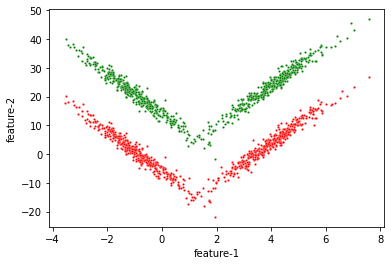

In [14]:
sns.scatterplot(trainl_data.loc[trainl_data.label==0]['X'].to_numpy(),trainl_data.loc[trainl_data.label==0]['Y'],s=5,color='red')
sns.scatterplot(trainl_data.loc[trainl_data.label==1]['X'].to_numpy(),trainl_data.loc[trainl_data.label==1]['Y'],s=5,color='green')
plt.xlabel('feature-1')
plt.ylabel('feature-2')
plt.show()

In [15]:
print(trainl_data.loc[trainl_data.label==0]['X'])

249   -0.17474
353   -0.98303
537    0.19247
424    4.06620
564    4.10060
        ...   
575    3.16040
514    4.46690
945   -1.40420
647   -0.56308
722    1.05570
Name: X, Length: 800, dtype: float64


In [16]:
train_data= trainl_data.loc[:,['X','Y']].values
test_data= testl_data.loc[:,['X','Y']].values
alldata= alldata_l.loc[:,['X','Y']].values

## K-Means

### WCSS

In [17]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
      sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  
  return sum

In [18]:
len(train_data)

1600

In [30]:
import random
def kmeans(X, k):
  
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster  

In [33]:
k = 20
centroids, cluster = kmeans(train_data, k)

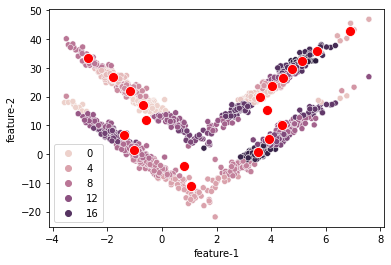

In [34]:
sns.scatterplot(train_data[:,0], train_data[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='r')

plt.xlabel('feature-1')
plt.ylabel('feature-2')
plt.show()

In [22]:
#Test Data
def predict(Y):
  cluster_test = np.zeros(Y.shape[0])
  for i, row in enumerate(Y):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster_test[i] = idx
  return cluster_test


In [23]:
Y_pred = predict(test_data)

In [24]:
print(Y_pred)

[1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [25]:
print(testl_data.loc[:,['label']])

    label
0       0
2       0
4       0
13      0
14      0
..    ...
986     1
987     1
988     1
992     1
997     1

[400 rows x 1 columns]
